In [1]:
!pip install  tensorflow
!pip install numpy
!pip install panda

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 421.8 MB 42 kB/s s eta 0:00:01  |                                | 1.1 MB 903 kB/s eta 0:07:46     |▍                               | 4.5 MB 903 kB/s eta 0:07:42     |▍                               | 5.6 MB 903 kB/s eta 0:07:41     |▋                               | 8.8 MB 903 kB/s eta 0:07:38     |█▋                              | 21.5 MB 10.7 MB/s eta 0:00:38     |██                              | 27.1 MB 10.7 MB/s eta 0:00:37     |██▋                             | 34.6 MB 6.3 MB/s eta 0:01:02     |███                             | 40.1 MB 6.3 MB/s eta 0:01:02     |███▋                            | 47.7 MB 13.7 MB/s eta 0:00:28     |████                            | 52.9 MB 12.4 MB/s eta 0:00:30     |████▊                           | 61.7 MB 12.4 MB/s eta 0:00:3

     |████████████████████████████████| 77 kB 3.8 MB/s eta 0:00:01
  Created wheel for wrapt: filename=wrapt-1.12.0-cp37-cp37m-linux_x86_64.whl size=70936 sha256=91ea58009c66274911ee5d4ed6d482b52d72b0bdbf3d391edb0dd125d6b1c651
  Stored in directory: /home/jovyan/.cache/pip/wheels/e5/78/69/f40ab7cae531c8f07003a9d1b4b81ebec14cda95519c57e7dd
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7540 sha256=091d61998866eac722342bbef58423b9c99671c68954308cd7dc0cc979685768
  Stored in directory: /home/jovyan/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
  Created wheel for opt-einsum: filename=opt_einsum-3.1.0-py3-none-any.whl size=61681 sha256=f7f0ecad50b9f0b87c9ef663718b985c3a8dbb9a124b9d58daf6a2b73ee6432a
  Stored in directory: /home/jovyan/.cache/pip/wheels/21/e3/31/0d3919995e859eff01713d381aac3b6b43c69915a2942e5c65
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4830 sha256=1add25e60fd9130f91d71dbe55a262aad0325e

In [4]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow as tf

In [5]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 1s 0us/step


In [6]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [7]:
predictions = model(x_train[:1]).numpy()
predictions


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



array([[ 0.40316775, -0.42857623,  0.0511319 ,  0.3815679 , -0.9618149 ,
        -0.21777306, -0.40077442,  0.785008  , -0.3138573 ,  0.20466936]],
      dtype=float32)

In [8]:
tf.nn.softmax(predictions).numpy()


array([[0.14023863, 0.06104441, 0.0986235 , 0.13724197, 0.03581486,
        0.07536965, 0.06276536, 0.20544651, 0.06846485, 0.11499021]],
      dtype=float32)

In [11]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)


In [10]:
loss_fn(y_train[:1], predictions).numpy()


2.5853505

In [12]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [13]:
model.fit(x_train, y_train, epochs=5)


Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2952 - accuracy: 0.9148
Epoch 2/5
60000/60000 [==============================] - 5s 89us/sample - loss: 0.1446 - accuracy: 0.9573
Epoch 3/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.1067 - accuracy: 0.9671
Epoch 4/5
60000/60000 [==============================] - 5s 91us/sample - loss: 0.0873 - accuracy: 0.9733
Epoch 5/5
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0743 - accuracy: 0.9771


In [14]:
model.evaluate(x_test,  y_test, verbose=2)


10000/10000 - 0s - loss: 0.0783 - accuracy: 0.9756


[0.07825802709995769, 0.9756]

In [15]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [16]:
probability_model(x_test[:5])


<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[1.79872330e-07, 1.13395755e-08, 2.86377531e-06, 8.31638827e-05,
        2.58702591e-11, 4.66672589e-07, 4.09418864e-13, 9.99905348e-01,
        1.03419097e-06, 6.85851455e-06],
       [8.45388315e-10, 3.53605137e-04, 9.99646068e-01, 3.05434668e-07,
        2.24563207e-12, 1.36814799e-08, 2.97787350e-09, 5.41119937e-13,
        9.13809473e-09, 1.33343537e-15],
       [3.83839136e-07, 9.99287307e-01, 1.92696098e-04, 8.43679845e-06,
        5.21610673e-05, 4.68386588e-06, 4.33751738e-05, 2.17339446e-04,
        1.92735431e-04, 1.01480396e-06],
       [9.99943137e-01, 7.78865805e-10, 1.36582121e-05, 8.50975042e-08,
        9.41877488e-07, 6.82256371e-07, 2.33372830e-05, 1.51754220e-05,
        2.86815371e-09, 2.94709025e-06],
       [4.00421459e-06, 3.35911530e-08, 8.39266977e-06, 5.61937100e-07,
        9.72770989e-01, 5.21525817e-06, 7.43119745e-06, 1.10053654e-04,
        5.24786010e-05, 2.70408913e-02]], dtype=float32)>

In [2]:
# Fasion images image classification
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


In [3]:
# Load cloth images data
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [11]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [12]:
train_images.shape


(60000, 28, 28)

In [13]:
test_images.shape

(10000, 28, 28)

In [14]:
len(train_labels)


60000

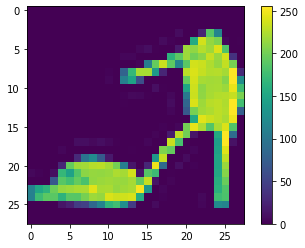

In [20]:
# random show train image
import random
plt.figure()
random_index= random.randint(0,len(train_labels)-1)
plt.imshow(train_images[random_index])
plt.colorbar()
plt.grid(False)
plt.show()

In [21]:
train_images = train_images / 255.0

test_images = test_images / 255.0

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

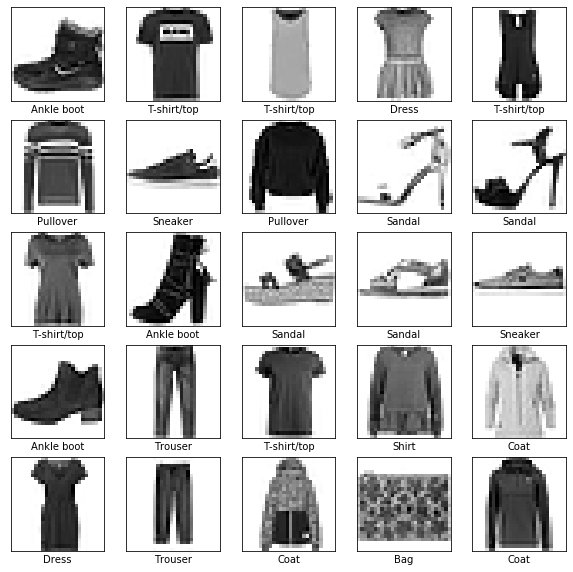

In [23]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [24]:
# train model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [25]:
# compile train model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [26]:
# start to train model
model.fit(train_images, train_labels, epochs=10)


Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.5023 - accuracy: 0.8250
Epoch 2/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.3787 - accuracy: 0.8625
Epoch 3/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.3387 - accuracy: 0.8753
Epoch 4/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.3144 - accuracy: 0.8855
Epoch 5/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.2958 - accuracy: 0.8914
Epoch 6/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.2818 - accuracy: 0.8959
Epoch 7/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.2691 - accuracy: 0.8994
Epoch 8/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2586 - accuracy: 0.9033
Epoch 9/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.2489 - accuracy: 0.9077
Epoch 10/10
60

In [27]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3218 - accuracy: 0.8888

Test accuracy: 0.8888


In [110]:
# predict 
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]



array([1.3096528e-07, 3.5551143e-10, 1.1693158e-07, 2.1076569e-07,
       5.0719672e-07, 2.0181956e-03, 2.4200485e-06, 2.7531441e-02,
       5.8940810e-07, 9.7044647e-01], dtype=float32)

In [31]:
# highest confidence value
np.argmax(predictions[0])

9

In [34]:
test_labels[0]

9

In [35]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

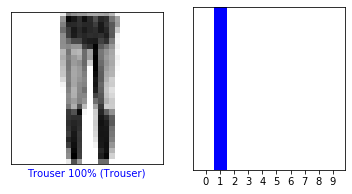

In [37]:
i = 3
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

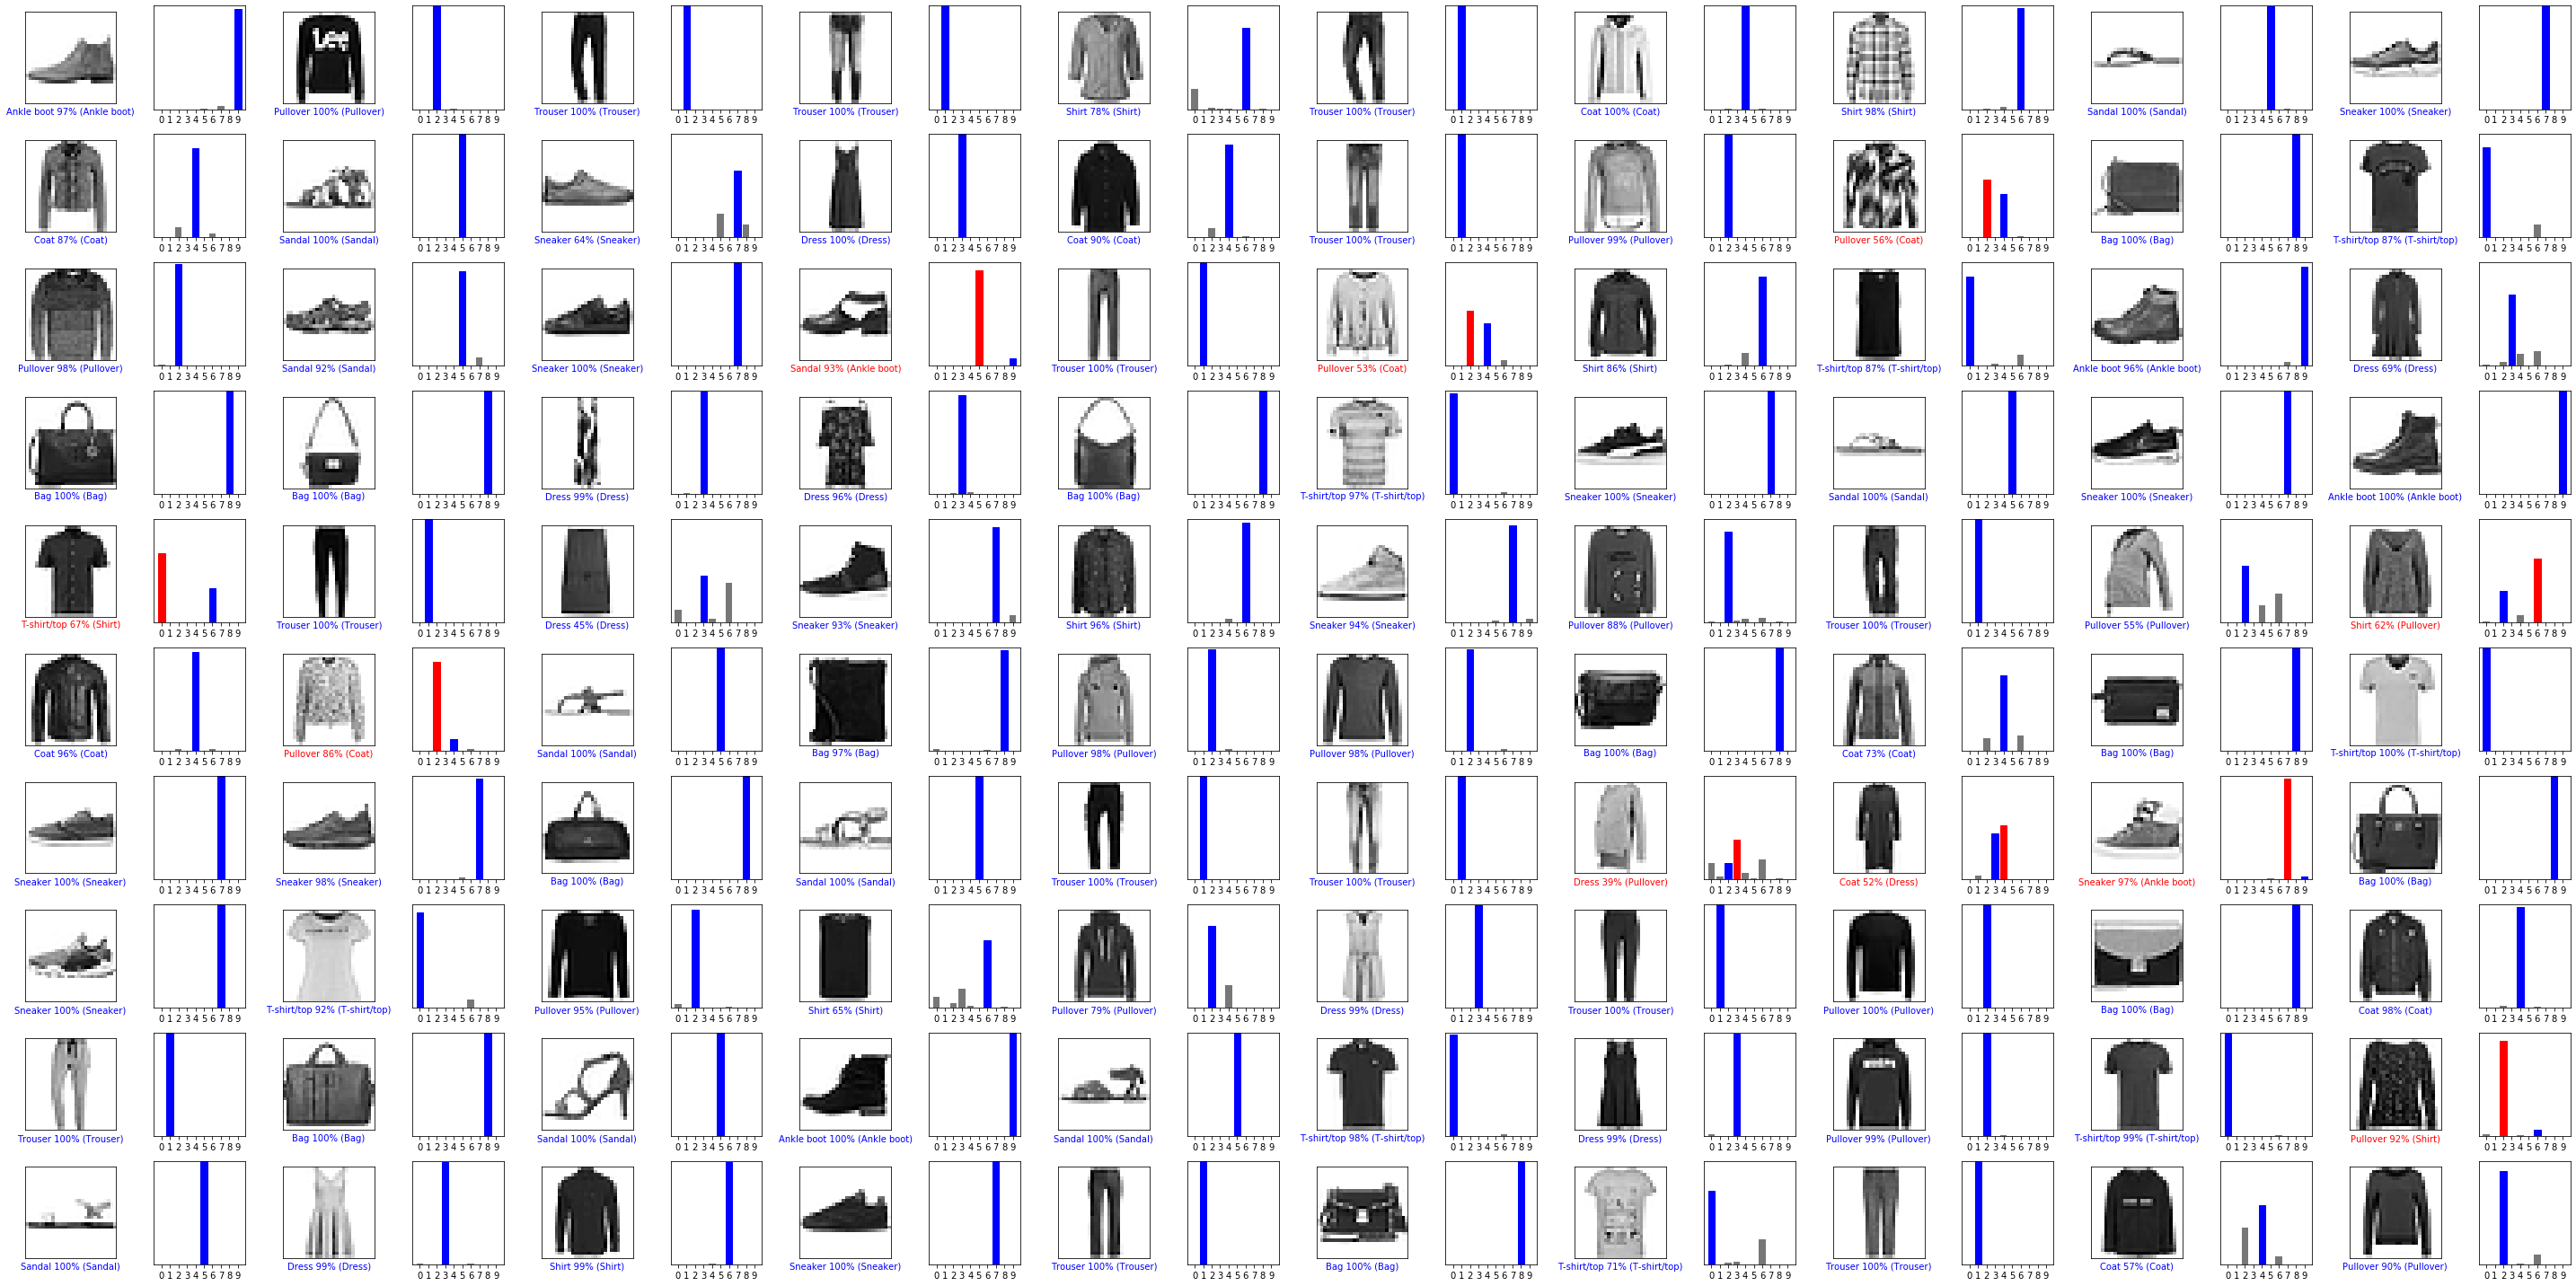

In [116]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 10
num_cols = 10
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [40]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [41]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [42]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[7.0675028e-06 1.8602970e-15 9.9920410e-01 4.8452680e-14 6.3937681e-04
  1.1733235e-12 1.4944869e-04 3.3291259e-16 6.8916498e-11 7.2723328e-14]]


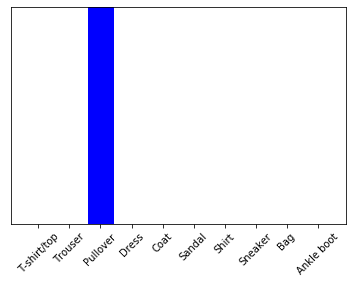

In [43]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [44]:
np.argmax(predictions_single[0])


2

==============test data=======================
test data label index => 0
test data label => T-shirt/top


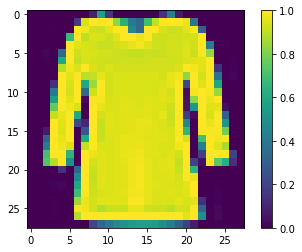

==============predict result=======================
Predicted Label => 6
predicted value => 0.5594891905784607
Shirt


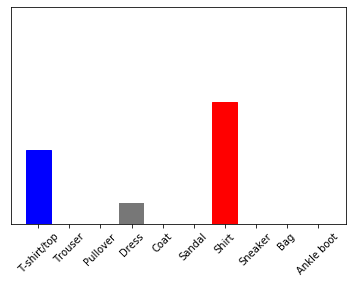

In [128]:
# single image detect

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
def predict_single_image(i):
    # Grab an image from the test dataset.
    img = test_images[i]
    print('==============test data=======================')
    print('test data label index => {}'.format(test_labels[i]))
    print('test data label => {}'.format(class_names[test_labels[i]]))
    
    plt.figure()
    plt.imshow(img)
    plt.colorbar()
    plt.grid(False)
    plt.show()
    print('==============predict result=======================')
    # Add the image to a batch where it's the only member.
    img = (np.expand_dims(img,0))
    predictions_single = probability_model.predict(img)
    print('Predicted Label => {}'.format(np.argmax(predictions_single[0])))
    print('predicted value => {}'.format(predictions_single[0][np.argmax(predictions_single[0])]))
    print(class_names[np.argmax(predictions_single[0])])

    plot_value_array(i, predictions_single[0], test_labels)
    _ = plt.xticks(range(10), class_names, rotation=45)
    
        
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

predict_single_image(141)

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 1
num_cols = 1
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()